# 🧠 Sentiment Analysis Using TextBlob and VADER – Internship Task 4

This project focuses on performing sentiment analysis on text data using Natural Language Processing (NLP) techniques. The primary goal is to classify each text as **Positive**, **Negative**, or **Neutral** using two widely-used lexicon-based models: **TextBlob** and **VADER**. The analysis simulates real-world scenarios such as understanding customer opinions on social media, reviews, or news articles. By comparing the results of both models, we aim to understand public sentiment trends and draw meaningful insights that can be used in marketing, product development, and social feedback analysis.


**Step 1:** Install Required Libraries

In [5]:
!pip install textblob
!pip install vaderSentiment
!pip install nltk


**Step 2:** Import Libraries



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Step 3:** Load Dataset

In [7]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("twitter_sentiment_data.csv")
df.head()


Saving twitter_sentiment_data.csv to twitter_sentiment_data.csv


,tweet,sentiment
0,I love the new update! Everything feels so smo...,Positive
1,This is the worst experience I’ve had with any...,Negative
2,"It’s fine, nothing too exciting but not bad ei...",Neutral
3,Absolutely amazing service! Fast and reliable.,Positive
4,Terrible packaging. Item arrived broken.,Negative


**Step 4:** Clean the Text

In [8]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return text

df["clean_tweet"] = df["tweet"].apply(clean_text)
df[["tweet", "clean_tweet"]].head()


,tweet,clean_tweet
0,I love the new update! Everything feels so smo...,i love the new update everything feels so smoo...
1,This is the worst experience I’ve had with any...,this is the worst experience ive had with any ...
2,"It’s fine, nothing too exciting but not bad ei...",its fine nothing too exciting but not bad either
3,Absolutely amazing service! Fast and reliable.,absolutely amazing service fast and reliable
4,Terrible packaging. Item arrived broken.,terrible packaging item arrived broken


**Step 5:** Tokenization & Lemmatization

In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["processed_tweet"] = df["clean_tweet"].apply(preprocess)
df[["clean_tweet", "processed_tweet"]].head()


,clean_tweet,processed_tweet
0,i love the new update everything feels so smoo...,love new update everything feel smooth intuitive
1,this is the worst experience ive had with any ...,worst experience ive product
2,its fine nothing too exciting but not bad either,fine nothing exciting bad either
3,absolutely amazing service fast and reliable,absolutely amazing service fast reliable
4,terrible packaging item arrived broken,terrible packaging item arrived broken


**Step 6:** Sentiment with TextBlob

In [14]:
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["TextBlob_Sentiment"] = df["processed_tweet"].apply(get_textblob_sentiment)
df[["processed_tweet", "TextBlob_Sentiment"]].head()


,processed_tweet,TextBlob_Sentiment
0,love new update everything feel smooth intuitive,Positive
1,worst experience ive product,Negative
2,fine nothing exciting bad either,Neutral
3,absolutely amazing service fast reliable,Positive
4,terrible packaging item arrived broken,Negative


**Step 7:** Sentiment with VADER

In [15]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["VADER_Sentiment"] = df["processed_tweet"].apply(get_vader_sentiment)
df[["processed_tweet", "VADER_Sentiment"]].head()


,processed_tweet,VADER_Sentiment
0,love new update everything feel smooth intuitive,Positive
1,worst experience ive product,Negative
2,fine nothing exciting bad either,Positive
3,absolutely amazing service fast reliable,Positive
4,terrible packaging item arrived broken,Negative


**Step 8:** Compare Both Sentiment Results

In [16]:
comparison = df.groupby(["sentiment", "TextBlob_Sentiment", "VADER_Sentiment"]).size().reset_index(name='count')
comparison


,sentiment,TextBlob_Sentiment,VADER_Sentiment,count
0,Negative,Negative,Negative,23
1,Negative,Negative,Neutral,1
2,Negative,Neutral,Negative,4
3,Negative,Neutral,Neutral,3
4,Negative,Neutral,Positive,1
5,Negative,Positive,Negative,1
6,Negative,Positive,Positive,1
7,Neutral,Negative,Negative,1
8,Neutral,Neutral,Negative,4
9,Neutral,Neutral,Neutral,6


**Step 9:** Plot Sentiment Distribution

<ipython-input-17-3551314464>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="Set2")


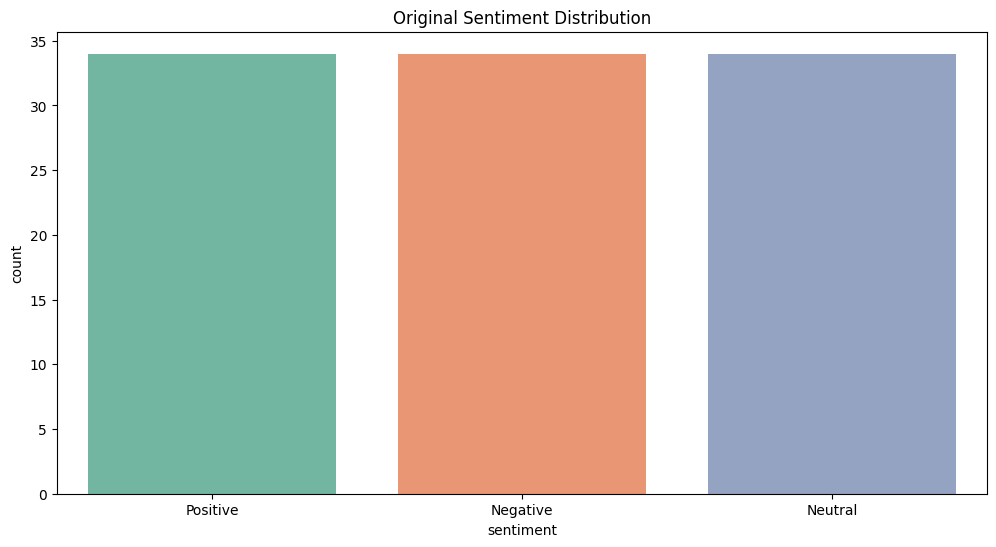

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="sentiment", palette="Set2")
plt.title("Original Sentiment Distribution")
plt.show()


<ipython-input-18-745561301>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="TextBlob_Sentiment", palette="Set1")


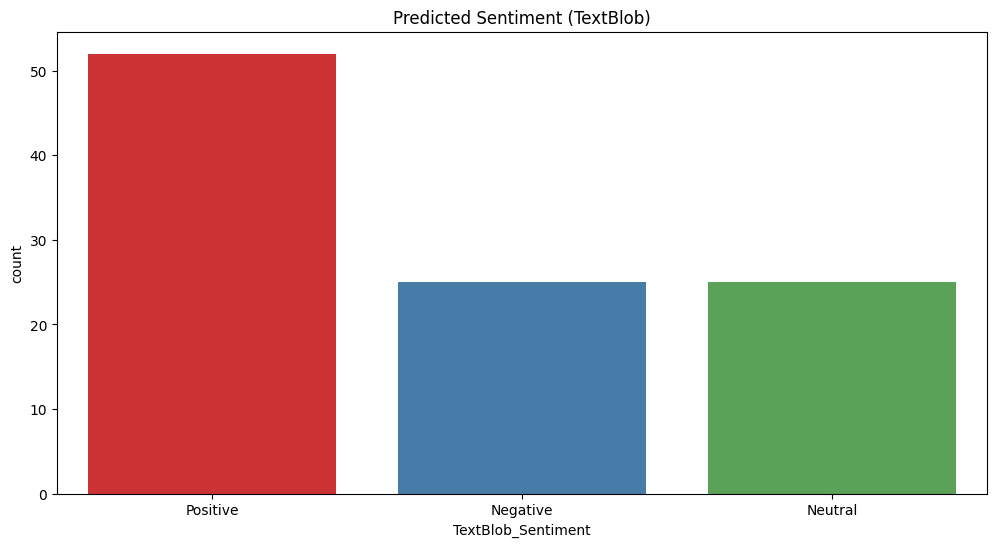

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="TextBlob_Sentiment", palette="Set1")
plt.title("Predicted Sentiment (TextBlob)")
plt.show()


<ipython-input-19-1263357055>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="VADER_Sentiment", palette="cool")


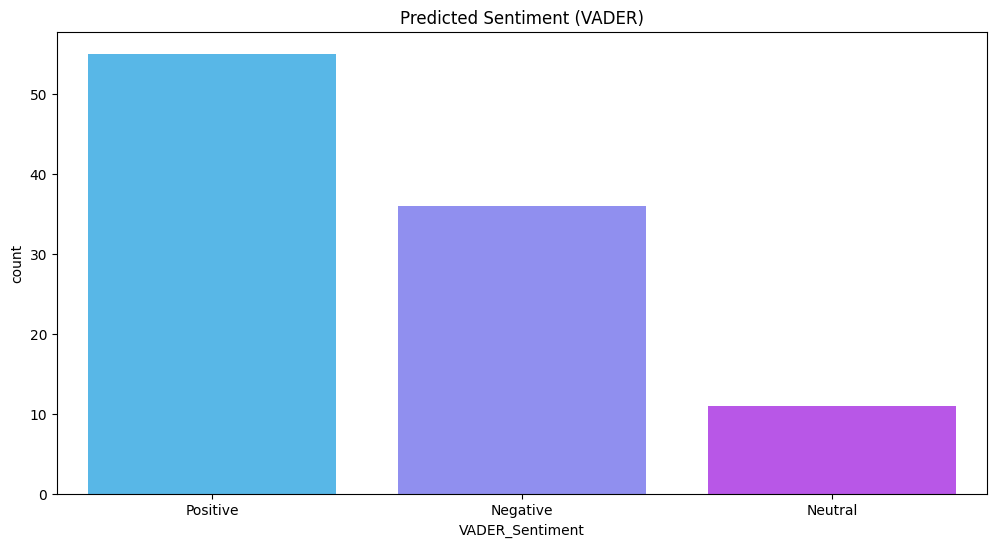

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="VADER_Sentiment", palette="cool")
plt.title("Predicted Sentiment (VADER)")
plt.show()


**Step 10:** Generate Word Clouds

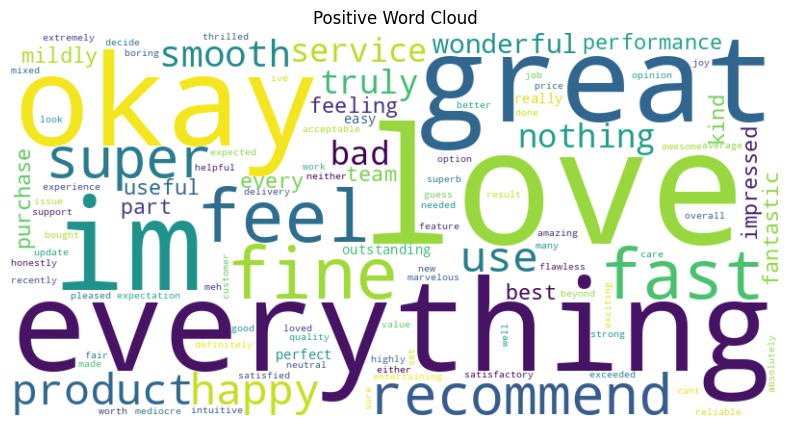

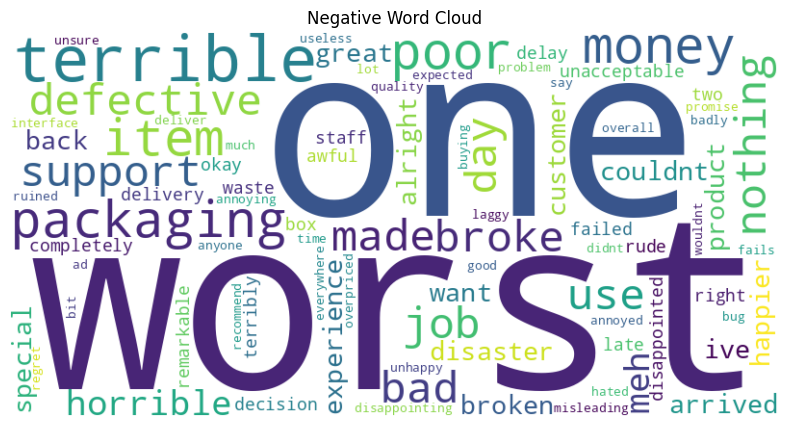

In [20]:
positive_text = " ".join(df[df["VADER_Sentiment"]=="Positive"]["processed_tweet"])
negative_text = " ".join(df[df["VADER_Sentiment"]=="Negative"]["processed_tweet"])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Word Cloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Word Cloud")
plt.show()


## ✅ Summary

This project demonstrates a complete sentiment analysis workflow, from data cleaning to prediction and visualization. By using both TextBlob and VADER, we were able to compare how different sentiment models interpret text differently:

- **TextBlob** showed a more balanced and conservative prediction pattern.
- **VADER**, optimized for social and informal language, identified more expressive sentiments, especially positive ones.

These differences highlight the importance of model selection based on the type of text data. This kind of analysis is essential for companies seeking to understand customer feedback, market sentiment, or public opinion in real-time.
